In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.assets._assets import Future
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

# Set-Up Pricing Data Access
trading_calendar = get_calendar('NYSE')
bundle = 'futures'
bundle_data = bundles.load(bundle)

data = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

fut = bundle_data.asset_finder.retrieve_futures_contracts([0])[0]

end_dt = pd.Timestamp('2018-01-05', tz='UTC', offset='C')
start_dt = pd.Timestamp('2018-01-02', tz='UTC', offset='C')
    
end_loc = trading_calendar.closes.index.get_loc(end_dt)

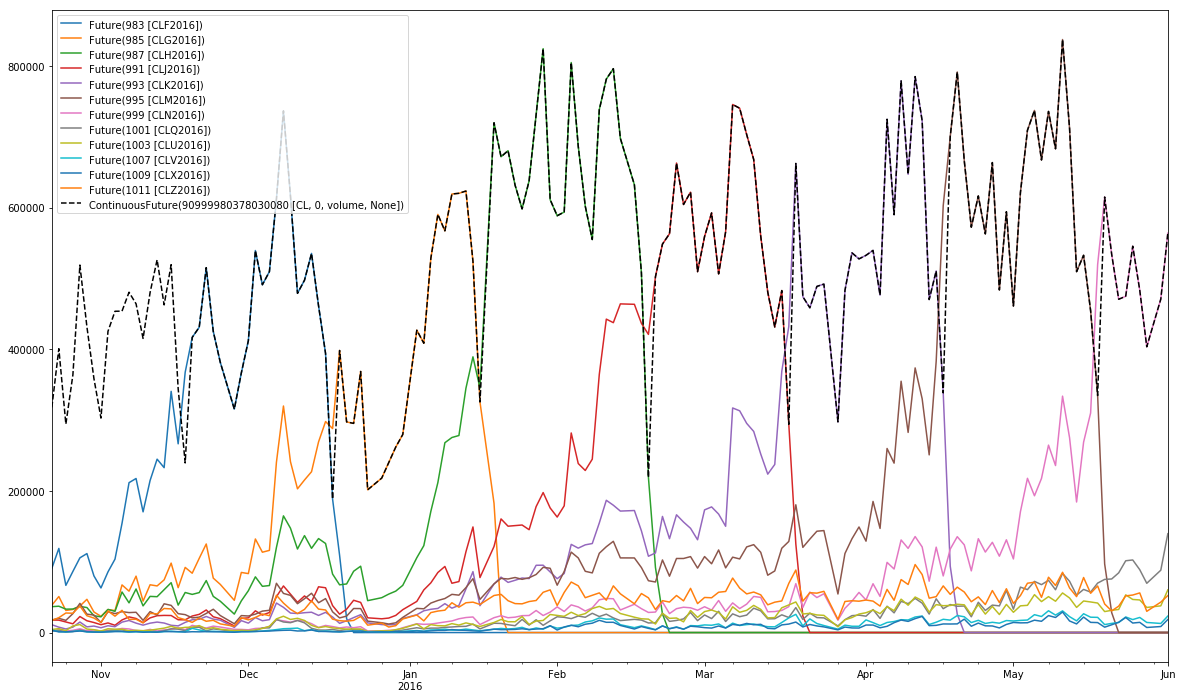

In [6]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data.get_history_window
symbol = 'CL'

continuous_cl = continuous_future(symbol, offset=0, roll_style='volume', adjustment=None)

cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['{}{}{}'.format(symbol, l, y) for l in 'FGHJKMNQUVXZ' for y in ['2016',]] #'2017'] ]
]

cl_contracts.append(continuous_cl)

start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

cl_consecutive_contract_volume.plot(figsize=(20,12), style={continuous_cl: 'k--'});

In [7]:
cl_consecutive_contract_volume['2016-03-01':'2016-03-31']

,Future(983 [CLF2016]),Future(985 [CLG2016]),Future(987 [CLH2016]),Future(991 [CLJ2016]),Future(993 [CLK2016]),Future(995 [CLM2016]),Future(999 [CLN2016]),Future(1001 [CLQ2016]),Future(1003 [CLU2016]),Future(1007 [CLV2016]),Future(1009 [CLX2016]),Future(1011 [CLZ2016]),"ContinuousFuture(90999980378030080 [CL, 0, volume, None])"
2016-03-01 00:00:00+00:00,0.0,0.0,0.0,559124.0,173183.0,107256.0,36425.0,24817.0,29612.0,10769.0,6923.0,49527.0,559124.0
2016-03-02 00:00:00+00:00,0.0,0.0,0.0,592382.0,177360.0,97096.0,31754.0,19728.0,31802.0,10297.0,6313.0,49092.0,592382.0
2016-03-03 00:00:00+00:00,0.0,0.0,0.0,506313.0,167236.0,116576.0,45234.0,30043.0,28302.0,12158.0,9238.0,56907.0,506313.0
2016-03-04 00:00:00+00:00,0.0,0.0,0.0,565803.0,150028.0,91353.0,29953.0,15578.0,19112.0,6589.0,6395.0,57988.0,565803.0
2016-03-07 00:00:00+00:00,0.0,0.0,0.0,745455.0,317049.0,106399.0,41856.0,26359.0,36360.0,13273.0,11481.0,76915.0,745455.0
2016-03-08 00:00:00+00:00,0.0,0.0,0.0,740152.0,313021.0,103926.0,33850.0,22399.0,28604.0,9937.0,10209.0,62712.0,740152.0
2016-03-09 00:00:00+00:00,0.0,0.0,0.0,702916.0,295267.0,120899.0,40139.0,24633.0,31330.0,11230.0,12906.0,54573.0,702916.0
2016-03-10 00:00:00+00:00,0.0,0.0,0.0,667739.0,283890.0,124081.0,50975.0,34366.0,38320.0,12055.0,10967.0,57169.0,667739.0
2016-03-11 00:00:00+00:00,0.0,0.0,0.0,559514.0,252007.0,113255.0,49643.0,30647.0,32737.0,9751.0,11630.0,53248.0,559514.0
2016-03-14 00:00:00+00:00,0.0,0.0,0.0,480600.0,223631.0,80957.0,29346.0,19318.0,20759.0,8288.0,5971.0,39155.0,480600.0


In [5]:
es = bundle_data.asset_finder.lookup_future_symbol('ESZ2018')

In [6]:
es.expiration_date

Timestamp('2018-12-21 00:00:00+0000', tz='UTC')

In [7]:
clf17_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2017').sid
start_dt = pd.Timestamp('2017-10-1', tz='UTC', offset='C')
cl = continuous_future('CL', offset=0, roll_style='calendar', adjustment='mul')
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19061 [CLF2017]),
 Future(19302 [CLG2017]),
 Future(19517 [CLH2017]),
 Future(19778 [CLJ2017]),
 Future(20005 [CLK2017]),
 Future(20236 [CLM2017]),
 Future(20480 [CLN2017]),
 Future(20720 [CLQ2017]),
 Future(20941 [CLU2017]),
 Future(21204 [CLV2017]),
 Future(21457 [CLX2017]),
 Future(21676 [CLZ2017]),
 Future(25083 [CLF2018]),
 Future(25308 [CLG2018]),
 Future(25508 [CLH2018]),
 Future(25755 [CLJ2018]),
 Future(25959 [CLK2018]),
 Future(26175 [CLM2018]),
 Future(26406 [CLN2018]),
 Future(26622 [CLQ2018]),
 Future(26830 [CLU2018]),
 Future(27062 [CLV2018]),
 Future(27295 [CLX2018]),
 Future(27488 [CLZ2018]),
 Future(27713 [CLF2019]),
 Future(27922 [CLG2019]),
 Future(28103 [CLH2019]),
 Future(28319 [CLJ2019]),
 Future(28493 [CLK2019]),
 Future(28675 [CLM2019]),
 Future(28865 [CLN2019]),
 Future(29055 [CLQ2019]),
 Future(29223 [CLU2019]),
 Future(29422 [CLV2019]),
 Future(29594 [CLX2019]),
 Future(29755 [CLZ2019]),
 Future(29936 [CLF2020]),
 Future(30097 [CLG2020]),
 Future(3023

In [8]:
all_chain[1].to_dict()

{'asset_name': 'Crude Oil Futures, February 2017 (CLG2017)',
 'auto_close_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-01-20 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-01-18 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19302,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLG2017',
 'tick_size': 0.01}

In [9]:
c = all_chain[-1]

In [10]:
c.symbol

'CLZ2025'

In [11]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field= 'price',
    data_frequency='daily'
)

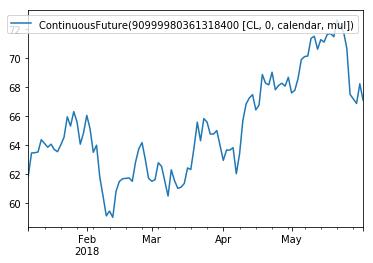

In [12]:
cf.plot()

In [13]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment=None)

In [14]:
cl.to_dict()

{'end_date': Timestamp('2018-11-01 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'offset': 0,
 'roll_style': 'volume',
 'root_symbol': 'CL',
 'sid': 90999980378030080,
 'start_date': Timestamp('1983-03-30 00:00:00+0000', tz='UTC')}

In [15]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')
chain = oc.active_chain(clf17_sid, start_dt.value)
all_chain = bundle_data.asset_finder.retrieve_all(chain)
all_chain

[Future(19061 [CLF2017]),
 Future(19302 [CLG2017]),
 Future(19517 [CLH2017]),
 Future(19778 [CLJ2017]),
 Future(20005 [CLK2017]),
 Future(20236 [CLM2017]),
 Future(20480 [CLN2017]),
 Future(20720 [CLQ2017]),
 Future(20941 [CLU2017]),
 Future(21204 [CLV2017]),
 Future(21457 [CLX2017]),
 Future(21676 [CLZ2017]),
 Future(25083 [CLF2018]),
 Future(25308 [CLG2018]),
 Future(25508 [CLH2018]),
 Future(25755 [CLJ2018]),
 Future(25959 [CLK2018]),
 Future(26175 [CLM2018]),
 Future(26406 [CLN2018]),
 Future(26622 [CLQ2018]),
 Future(26830 [CLU2018]),
 Future(27062 [CLV2018]),
 Future(27295 [CLX2018]),
 Future(27488 [CLZ2018]),
 Future(27713 [CLF2019]),
 Future(27922 [CLG2019]),
 Future(28103 [CLH2019]),
 Future(28319 [CLJ2019]),
 Future(28493 [CLK2019]),
 Future(28675 [CLM2019]),
 Future(28865 [CLN2019]),
 Future(29055 [CLQ2019]),
 Future(29223 [CLU2019]),
 Future(29422 [CLV2019]),
 Future(29594 [CLX2019]),
 Future(29755 [CLZ2019]),
 Future(29936 [CLF2020]),
 Future(30097 [CLG2020]),
 Future(3023

In [16]:
all_chain[2].to_dict()

{'asset_name': 'Crude Oil Futures, March 2017 (CLH2017)',
 'auto_close_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-02-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-02-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19517,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLH2017',
 'tick_size': 0.01}

In [17]:
all_chain[3].to_dict()

{'asset_name': 'Crude Oil Futures, April 2017 (CLJ2017)',
 'auto_close_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'exchange': 'NYMEX',
 'exchange_full': 'NYMEX',
 'expiration_date': Timestamp('2017-03-21 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'multiplier': 1000.0,
 'notice_date': Timestamp('2017-03-19 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 19778,
 'start_date': Timestamp('2011-11-18 00:00:00+0000', tz='UTC'),
 'symbol': 'CLJ2017',
 'tick_size': 0.01}

In [41]:
cf = history(
    assets=[continuous_future('JY', offset=0, roll_style="volume", adjustment=None)],
    end_dt=pd.Timestamp.today(),
    bar_count=100,
    frequency='1d',
    field='sid',
    data_frequency='daily'
)

Exception ignored in: 'zipline.assets.continuous_futures.OrderedContracts.contract_before_auto_close'
AttributeError: 'NoneType' object has no attribute 'next'


KeyError: 0

In [19]:
cf.columns=['contract']

In [20]:
contracts = cf['contract'].apply(lambda x: bundle_data.asset_finder.retrieve_asset(x))

In [21]:
contracts

2018-01-08 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-09 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-10 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-11 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-12 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-16 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-17 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-18 00:00:00+00:00    Future(25308 [CLG2018])
2018-01-19 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-22 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-23 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-24 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-25 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-26 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-29 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-30 00:00:00+00:00    Future(25508 [CLH2018])
2018-01-31 00:00:00+00:00    Future(25508 [CLH2018])
2018-02-01 00:00:00+00:00    Future(25508 [CLH2018])
2018-02-02 00:00:00+00:00    Future(25508 [CLH

In [22]:
cf = history(
    assets=[cl],
    end_dt=pd.Timestamp('2018-05-31'),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

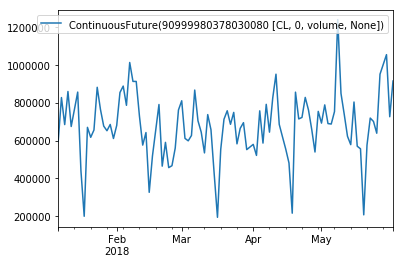

In [23]:
cf.plot();

In [42]:
oc = bundle_data.asset_finder.get_ordered_contracts('JY')
#chain = oc.active_chain(clf17_sid, start_dt.value)
#all_chain = bundle_data.asset_finder.retrieve_all(chain)
#all_chain

In [44]:
oc)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_end_date',
 '_head_contract',
 '_start_date',
 'active_chain',
 'chain_predicate',
 'contract_at_offset',
 'contract_before_auto_close',
 'end_date',
 'root_symbol',
 'sid_to_contract',
 'start_date']

In [46]:
oc.active_chain()

TypeError: active_chain() takes exactly 2 positional arguments (0 given)

In [25]:
oc.active_chain.__doc__

'OrderedContracts.active_chain(self, long_t starting_sid, long_t dt_value) -> __Pyx_memviewslice'

In [26]:
jy = continuous_future('JY', offset=0, adjustment=None, roll_style='volume')

In [27]:
jy

ContinuousFuture(92984598866165760, root_symbol='JY', offset=0, roll_style='volume', adjustment=None)

In [31]:
j = bundle_data.asset_finder.lookup_future_symbol('JYZ2018')

In [32]:
j.to_dict()

{'asset_name': 'Japanese Yen Futures, December 2018 (JYZ2018)',
 'auto_close_date': Timestamp('2018-12-15 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2018-11-01 00:00:00+0000', tz='UTC'),
 'exchange': 'CME',
 'exchange_full': 'CME',
 'expiration_date': Timestamp('2018-12-17 00:00:00+0000', tz='UTC'),
 'first_traded': Timestamp('2014-02-14 00:00:00+0000', tz='UTC'),
 'multiplier': 12.5,
 'notice_date': Timestamp('2018-12-15 00:00:00+0000', tz='UTC'),
 'root_symbol': 'JY',
 'sid': 27689,
 'start_date': Timestamp('2014-02-14 00:00:00+0000', tz='UTC'),
 'symbol': 'JYZ2018',
 'tick_size': 0.5}

In [48]:
type(j)

zipline.assets._assets.Future

In [49]:
j

Future(27689 [JYZ2018])

In [117]:
jy_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x) 
    for x
    in ['{}{}{}'.format('GC', l, y) for l in 'FGHJKMNQUVXZ' for y in ['2018']] #'2017'] ]
]

In [118]:
jy_contracts

[Future(25322 [GCF2018]),
 Future(25516 [GCG2018]),
 Future(25764 [GCH2018]),
 Future(25963 [GCJ2018]),
 Future(26181 [GCK2018]),
 Future(26444 [GCM2018]),
 Future(26629 [GCN2018]),
 Future(26838 [GCQ2018]),
 Future(27079 [GCU2018]),
 Future(27313 [GCV2018]),
 Future(27501 [GCX2018]),
 Future(27742 [GCZ2018])]

In [119]:
for contract in jy_contracts:
    print(contract.to_dict())
    print()

{'tick_size': 0.1, 'auto_close_date': Timestamp('2018-01-27 00:00:00+0000', tz='UTC'), 'start_date': Timestamp('2017-10-30 00:00:00+0000', tz='UTC'), 'exchange_full': 'CEC', 'root_symbol': 'GC', 'symbol': 'GCF2018', 'expiration_date': Timestamp('2018-01-29 00:00:00+0000', tz='UTC'), 'exchange': 'CEC', 'sid': 25322, 'end_date': Timestamp('2018-01-29 00:00:00+0000', tz='UTC'), 'asset_name': 'Gold Futures, January 2018 (GCF2018)', 'notice_date': Timestamp('2018-01-27 00:00:00+0000', tz='UTC'), 'multiplier': 100.0, 'first_traded': Timestamp('2017-10-30 00:00:00+0000', tz='UTC')}

{'tick_size': 0.1, 'auto_close_date': Timestamp('2018-02-24 00:00:00+0000', tz='UTC'), 'start_date': Timestamp('2016-03-30 00:00:00+0000', tz='UTC'), 'exchange_full': 'CEC', 'root_symbol': 'GC', 'symbol': 'GCG2018', 'expiration_date': Timestamp('2018-02-26 00:00:00+0000', tz='UTC'), 'exchange': 'CEC', 'sid': 25516, 'end_date': Timestamp('2018-02-26 00:00:00+0000', tz='UTC'), 'asset_name': 'Gold Futures, February 2

In [120]:
his = history(
    assets=jy_contracts,
    end_dt=pd.Timestamp.today(),
    bar_count=100,
    frequency='1d',
    field='volume',
    data_frequency='daily'
        )

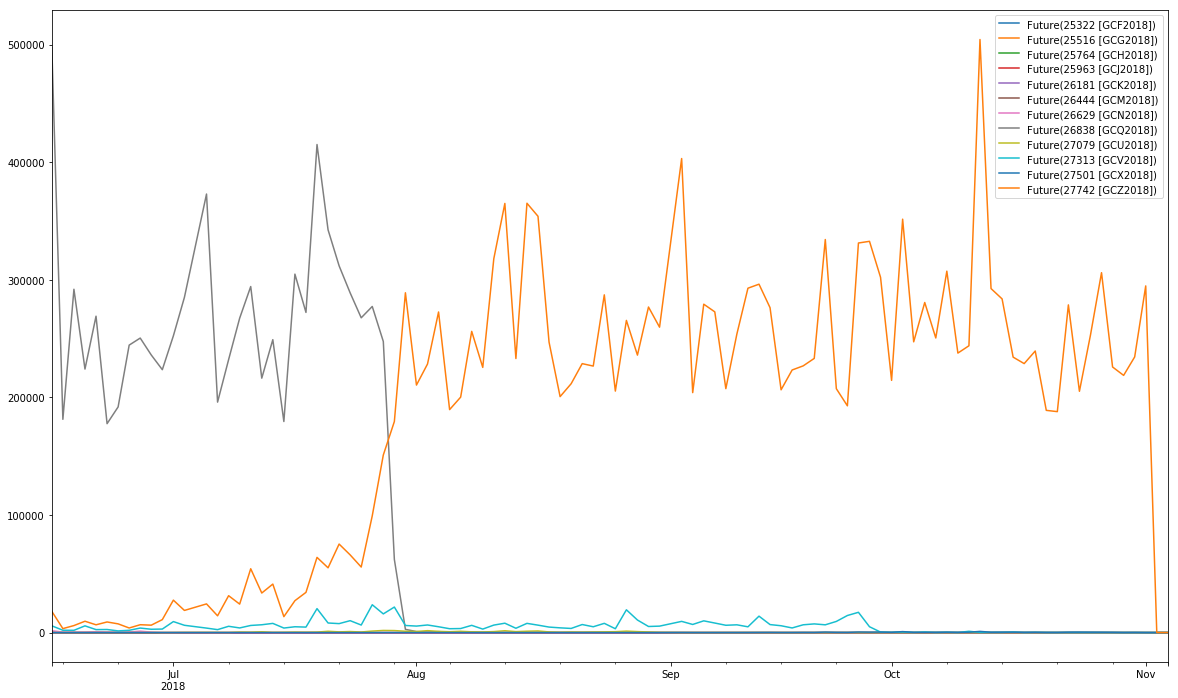

In [121]:
his.plot(figsize=(20,12));

In [122]:
gc = bundle_data.asset_finder.lookup_future_symbol('GCV2018')

In [123]:
his = history(
    assets=[gc],
    end_dt=pd.Timestamp.today(),
    bar_count=100,
    frequency='1d',
    field='close',
    data_frequency='daily'
        )

In [124]:
his

,Future(27313 [GCV2018])
2018-06-15 00:00:00+00:00,1287.9
2018-06-18 00:00:00+00:00,1287.0
2018-06-19 00:00:00+00:00,1283.1
2018-06-20 00:00:00+00:00,1275.6
2018-06-21 00:00:00+00:00,1274.9
2018-06-22 00:00:00+00:00,1277.2
2018-06-25 00:00:00+00:00,1273.7
2018-06-26 00:00:00+00:00,1266.3
2018-06-27 00:00:00+00:00,1259.1
2018-06-28 00:00:00+00:00,1254.8
